# Importing Libraries

In [64]:
import nltk
import re

from nltk.corpus import stopwords
import string
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
import pandas as pd 
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

# For SWE Textbook

In [27]:
nltk.download('stopwords')


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


False

In [28]:
nltk.download('punkt')


[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


False

In [29]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify
[nltk_data]     failed: unable to get local issuer certificate
[nltk_data]     (_ssl.c:997)>


False

### Reading book and converting it into text variable

In [145]:
file = open("SWE.txt",encoding='utf-8')
wordslist = file.read().splitlines() # to escape \n occurence
wordslist = [i for i in wordslist if i!='']
text = ""
text = text.join(wordslist)


In [ ]:
text


In [ ]:
text

In [33]:
len(text)

2561369

### Preprocessing

In [236]:
# remove whitespace from text
from unittest import skip

def remove_whitespace(text):
    return  " ".join(text.split())

#Creating a string which has all the punctuations to be removed
punctuations = '''!()-[]{}■;:'"\—©•,<>=`./''?“”@#$%^&*_~'''
cleantext = ""
flag=1
for char in text:
    if char not in punctuations:
        cleantext = cleantext + char
        
        

#Converting the text into lower case   
cleantext = cleantext.lower()
text = cleantext.replace("figure",'')                                                                       #replacing figures
cleantext= re.sub(r'(https|http)?:V(\W\.IVI\?]\=1\&|\%) *\b', '', cleantext, flags=re. MULTILINE)           #removing url and links
cleantext= re. sub(r' (www.[a-z]*. [a-z]*)','', cleantext)
cleantext = re.sub(r'[cC]hapter[0-9]+','',cleantext)                                                        #removing chapter heading
cleantext =re. sub(r'-(\n)','', cleantext)                                                                  #adding words segmented by line break
cleantext =re.sub(r' (\n)',' ', cleantext)                                                                  # changing linebreaks to space
cleantext= re.sub(r'[\+]+','',cleantext)                                                                    # removing + & = symbols
cleantext = re.sub(r'[0-9]+','',cleantext)                                                                  #removing numbers
cleantext= remove_whitespace(cleantext)                                                                     #removing whitespace

In [ ]:
cleantext

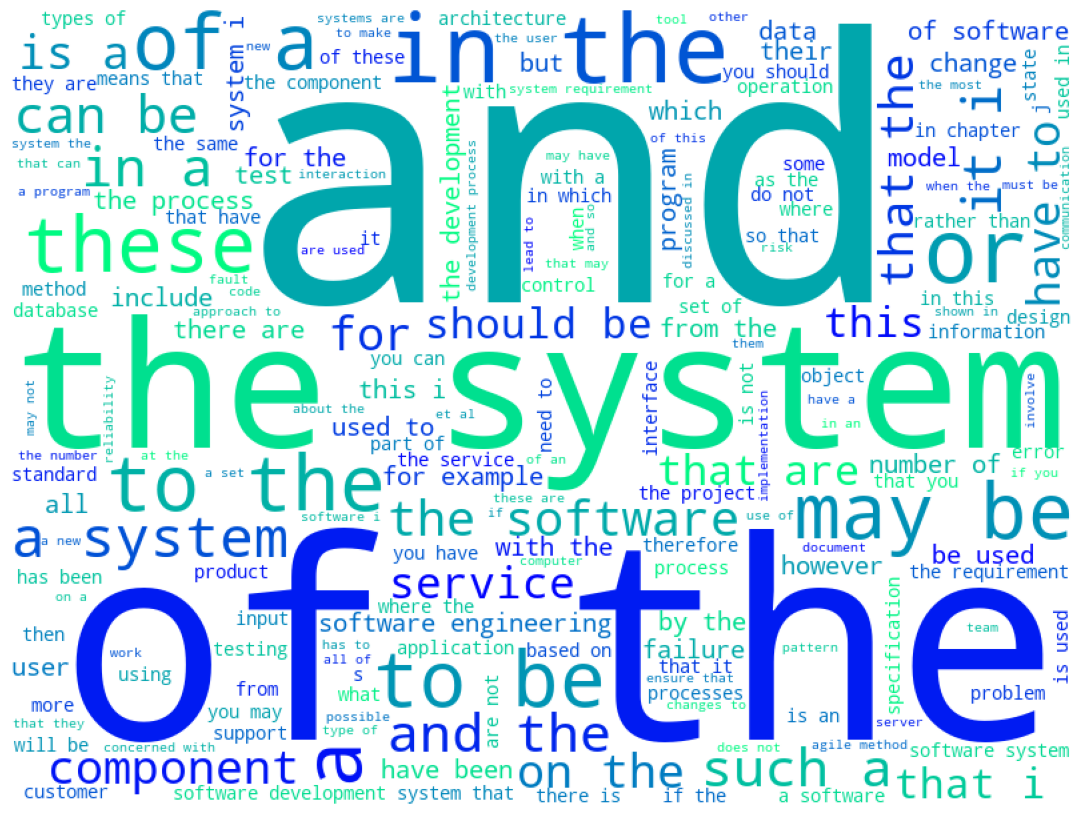

In [158]:
# Word cloud without removing stopwords
wordcloud = WordCloud(width = 800, height = 600, 
                background_color ='white', 
                min_font_size = 10,stopwords = {},colormap='winter').generate(cleantext) 

plt.figure(figsize = (12,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

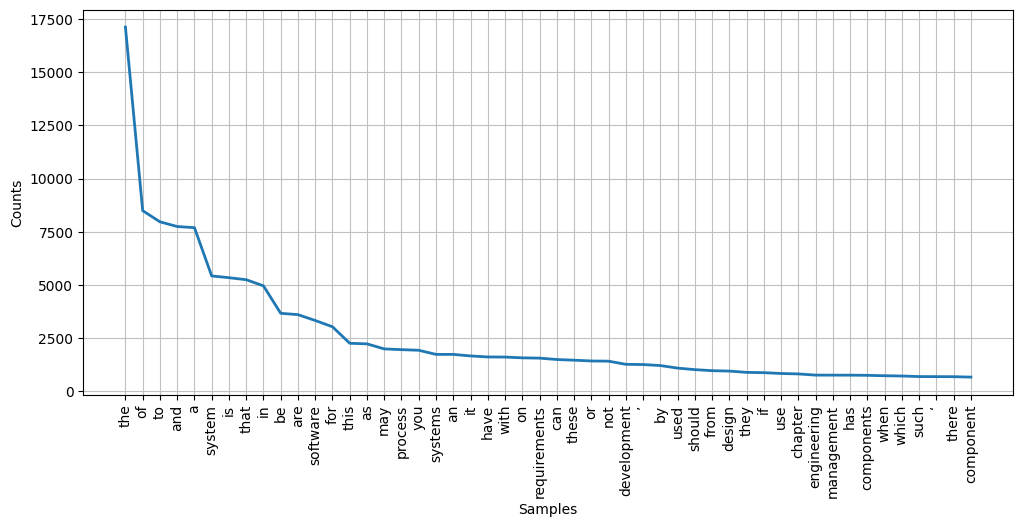

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [242]:
tokens = word_tokenize(cleantext)
freq = nltk.FreqDist(tokens)
plt.figure(figsize=(12,5))
freq.plot(50, cumulative=False)

In [247]:

tokens=word_tokenize(cleantext)
print(len(tokens))
tokens


291639


['software',
 'engineering',
 'ninth',
 'edition',
 'ian',
 'sommerville',
 'addisonwesley',
 'boston',
 'columbus',
 'indianapolis',
 'new',
 'york',
 'san',
 'francisco',
 'upper',
 'saddle',
 'riveramsterdam',
 'cape',
 'town',
 'dubai',
 'london',
 'madrid',
 'milan',
 'munich',
 'paris',
 'montreal',
 'toronto',
 'delhi',
 'mexico',
 'city',
 'são',
 'paulo',
 'sydney',
 'hong',
 'kong',
 'seoul',
 'singapore',
 'taipei',
 'tokyoeditorial',
 'director',
 'marcia',
 'hortoneditor',
 'in',
 'chief',
 'michael',
 'hirschacquisitions',
 'editor',
 'matt',
 'goldsteineditorial',
 'assistant',
 'chelsea',
 'bellmanaging',
 'editor',
 'jeff',
 'holcombsenior',
 'production',
 'project',
 'manager',
 'marilyn',
 'lloyddirector',
 'of',
 'marketing',
 'margaret',
 'waplesmarketing',
 'coordinator',
 'kathryn',
 'ferrantisenior',
 'manufacturing',
 'buyer',
 'carol',
 'melvilletext',
 'designer',
 'susan',
 'raymondcover',
 'art',
 'director',
 'elena',
 'sidorovafront',
 'cover',
 'photogr

In [176]:
type(tokens)
len(tokens)

291657

In [241]:
frequency_distribution=nltk. FreqDist(tokens)
print (frequency_distribution.most_common(15))
freq_dist=list (frequency_distribution)

[('the', 17121), ('of', 8491), ('to', 7966), ('and', 7745), ('a', 7691), ('system', 5421), ('is', 5339), ('that', 5244), ('in', 4954), ('be', 3664), ('are', 3602), ('software', 3326), ('for', 3031), ('this', 2255), ('as', 2228)]


### Removing stopwords and tokenising

In [254]:
# Removing stopwords and storing it into finaltext
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(cleantext)
tokens_final = [i for i in tokens if not i in stop_words] # tokenising with removing stopwords
finaltext = "  "
finaltext = finaltext.join(tokens_final)

In [ ]:
finaltext

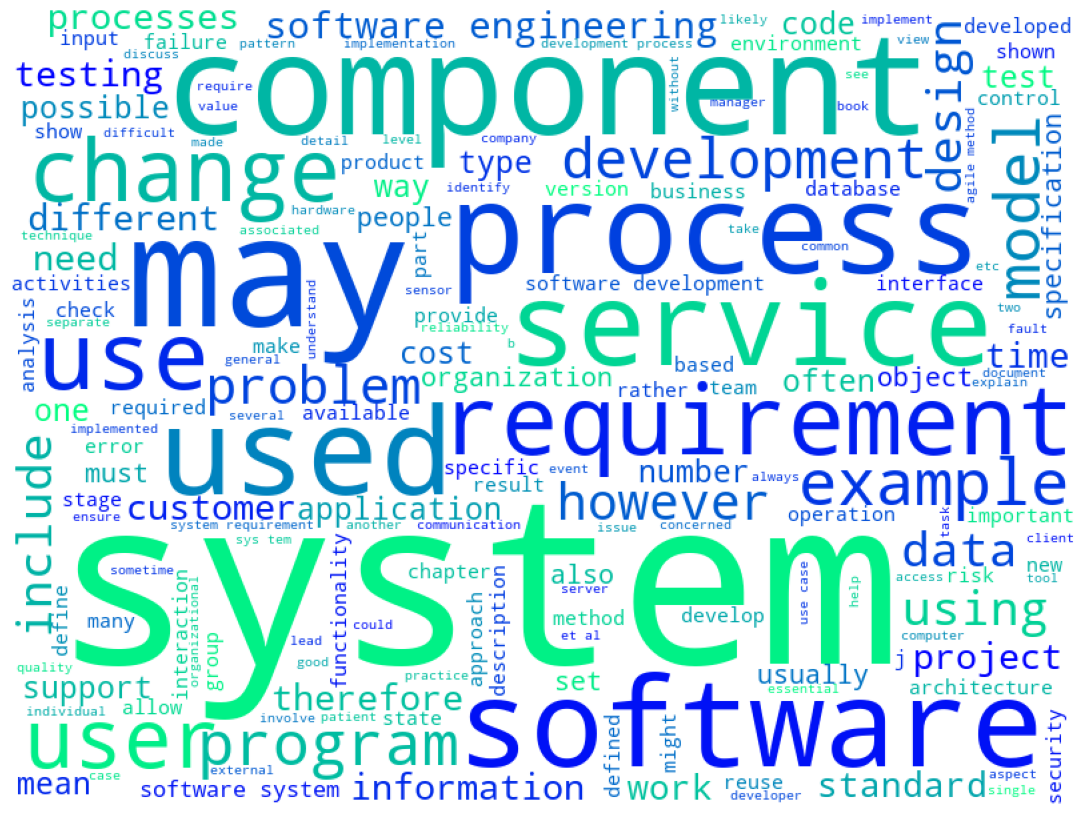

In [179]:
# Word cloud after removing stopwords
wordcloud = WordCloud(width = 800, height = 600, 
                background_color ='white', 
                min_font_size = 10,stopwords = {},colormap='winter').generate(finaltext) 

plt.figure(figsize = (12,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

### Frequency distribution of tokens

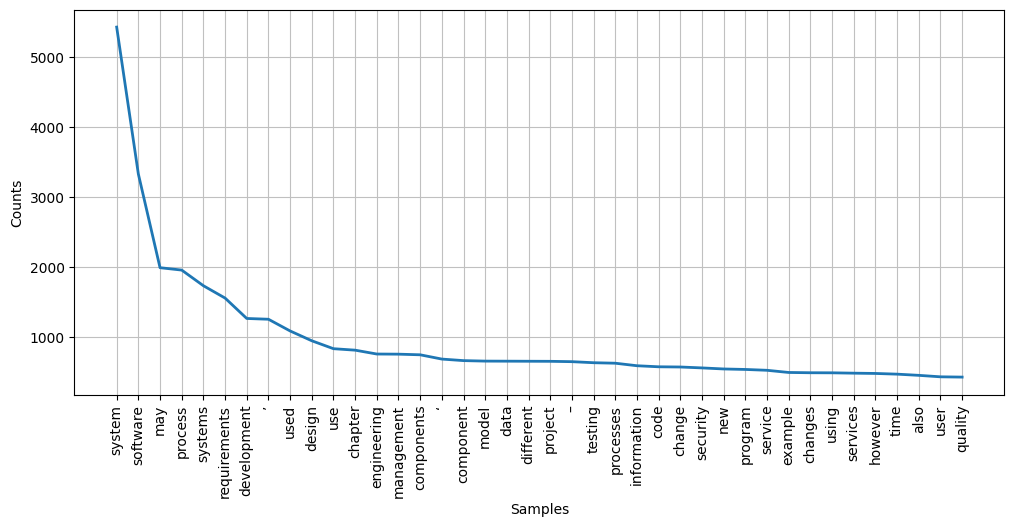

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [255]:
tokens = word_tokenize(finaltext)
tokens = [i for i in tokens if not i in stop_words]
freq = nltk.FreqDist(tokens)
plt.figure(figsize=(12,5))
freq.plot(40, cumulative=False)

In [246]:
frequency_distribution=nltk. FreqDist(tokens)
print (frequency_distribution.most_common(30))
freq_dist=list (frequency_distribution)

[('system', 5421), ('software', 3326), ('may', 1990), ('process', 1956), ('systems', 1733), ('requirements', 1557), ('development', 1266), ('’', 1255), ('used', 1088), ('design', 948), ('use', 835), ('chapter', 814), ('engineering', 759), ('management', 757), ('components', 748), ('‘', 687), ('component', 665), ('model', 658), ('data', 657), ('different', 656), ('project', 655), ('–', 650), ('testing', 635), ('processes', 628), ('information', 592), ('code', 577), ('change', 574), ('security', 561), ('new', 546), ('program', 539)]


In [256]:
tagged = nltk.pos_tag(tokens)
tagged.sort()
tagged

[('\x02', 'RB'),
 ('\x03', 'JJ'),
 ('\x03', 'NNP'),
 ('\x03', 'NNP'),
 ('\x03', 'NNP'),
 ('\x03', 'NNP'),
 ('\x03', 'NNP'),
 ('\x03', 'NNP'),
 ('\x03', 'NNP'),
 ('\x03', 'NNP'),
 ('\x03', 'NNP'),
 ('\x03', 'NNP'),
 ('\x03', 'NNP'),
 ('\x03', 'NNP'),
 ('\x03', 'NNP'),
 ('\x03', 'NNP'),
 ('\x04', 'NNP'),
 ('\x04', 'NNP'),
 ('\x04', 'NNP'),
 ('\x04', 'NNP'),
 ('\x04', 'NNP'),
 ('\x06', 'NN'),
 ('\x06', 'NNP'),
 ('\x07', 'NN'),
 ('\x07', 'NNP'),
 ('\x07', 'NNP'),
 ('\x07', 'NNP'),
 ('\x07', 'NNP'),
 ('\x07', 'NNP'),
 ('\x07', 'NNP'),
 ('\x07', 'NNP'),
 ('\x07', 'NNP'),
 ('\x07', 'NNP'),
 ('\x07', 'NNP'),
 ('\x07', 'NNP'),
 ('\x07', 'NNP'),
 ('\x07', 'NNP'),
 ('\x07', 'NNP'),
 ('\x07', 'NNP'),
 ('aa', 'JJ'),
 ('aa', 'NN'),
 ('aa', 'NN'),
 ('aaf', 'JJ'),
 ('aam', 'JJ'),
 ('aam', 'JJ'),
 ('aam', 'JJ'),
 ('aam', 'NN'),
 ('aam', 'VBZ'),
 ('aan', 'JJ'),
 ('abandon', 'JJ'),
 ('abandoned', 'VBN'),
 ('abandoned', 'VBN'),
 ('abbott', 'JJ'),
 ('abbott', 'VBP'),
 ('abbreviation', 'NN'),
 ('abbreviatio

In [253]:
tagged.sort()
tagged

[('\x02', 'NNP'),
 ('\x03', 'IN'),
 ('\x03', 'JJ'),
 ('\x03', 'NNP'),
 ('\x03', 'NNP'),
 ('\x03', 'NNP'),
 ('\x03', 'NNP'),
 ('\x03', 'NNP'),
 ('\x03', 'NNP'),
 ('\x03', 'NNP'),
 ('\x03', 'NNP'),
 ('\x03', 'NNS'),
 ('\x03', 'PDT'),
 ('\x03', 'VBD'),
 ('\x03', 'VBD'),
 ('\x03', 'VBZ'),
 ('\x04', 'NNP'),
 ('\x04', 'NNP'),
 ('\x04', 'NNP'),
 ('\x04', 'NNP'),
 ('\x04', 'VBP'),
 ('\x06', 'IN'),
 ('\x06', 'NNP'),
 ('\x07', 'JJ'),
 ('\x07', 'JJ'),
 ('\x07', 'JJ'),
 ('\x07', 'JJ'),
 ('\x07', 'NN'),
 ('\x07', 'NNP'),
 ('\x07', 'NNP'),
 ('\x07', 'NNP'),
 ('\x07', 'NNP'),
 ('\x07', 'NNP'),
 ('\x07', 'NNP'),
 ('\x07', 'NNP'),
 ('\x07', 'NNP'),
 ('\x07', 'NNP'),
 ('\x07', 'NNP'),
 ('\x07', 'NNP'),
 ('a', 'DT'),
 ('a', 'DT'),
 ('a', 'DT'),
 ('a', 'DT'),
 ('a', 'DT'),
 ('a', 'DT'),
 ('a', 'DT'),
 ('a', 'DT'),
 ('a', 'DT'),
 ('a', 'DT'),
 ('a', 'DT'),
 ('a', 'DT'),
 ('a', 'DT'),
 ('a', 'DT'),
 ('a', 'DT'),
 ('a', 'DT'),
 ('a', 'DT'),
 ('a', 'DT'),
 ('a', 'DT'),
 ('a', 'DT'),
 ('a', 'DT'),
 ('a', 'DT')

In [140]:
from collections import Counter
counts = Counter( tag for word,  tag in tagged)
print(counts)

Counter({'NN': 67265, 'JJ': 26511, 'NNS': 25784, 'VBP': 8383, 'RB': 6918, 'VBG': 6466, 'VBN': 6118, 'VBD': 5325, 'VBZ': 4317, 'VB': 4094, 'MD': 2936, 'IN': 1433, 'NNP': 1380, 'CD': 821, 'JJR': 407, 'RBR': 228, 'FW': 227, 'DT': 209, 'JJS': 176, 'CC': 89, 'PRP': 63, 'RP': 58, 'WP$': 30, 'WRB': 26, 'WDT': 22, 'RBS': 16, 'WP': 15, 'POS': 11, 'PRP$': 5, 'SYM': 4, 'TO': 1, 'NNPS': 1})


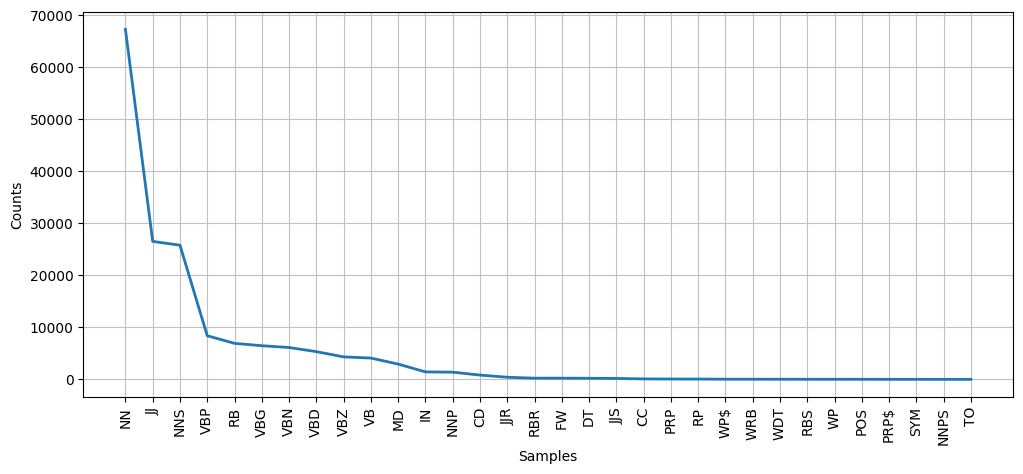

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [136]:
freq_tags = nltk.FreqDist(counts)
plt.figure(figsize=(12,5))
freq_tags.plot(50, cumulative=False)

In [23]:
# For word length vs Frequency distribution

In [138]:
import numpy as np
bin_size=np.linspace(0,16)

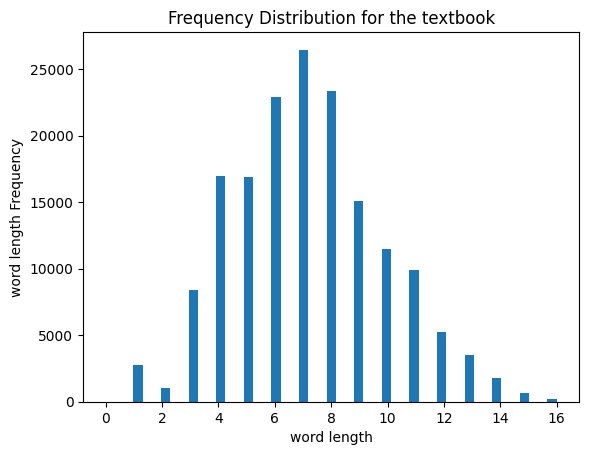

In [139]:
#Finding Wordlength and storing it as a list
wordLength = [len(r) for r in tokens]

#Plotting histogram of Word length vs Frequency
plt.hist(wordLength, bins=bin_size)
plt.xlabel('word length')
plt.ylabel('word length Frequency')
plt.title('Frequency Distribution for the textbook')
plt.show()
